# 🐕   P E T I C O S   🐈

# Importação

### Leitura, Tratamento e Análise

In [1]:
# o pandas é usado para ler e manipular os dados da nossa base (o arquivo)
import pandas as pd

# o matplotlib e plotly para mostrar os dados em forma de gráficos
import matplotlib.pyplot as plt
import plotly.express as px

# o pickle é usado para ler um modelo criado em outro arquivo
import pickle

C:\Users\guilhermelanzoni-ieg\AppData\Local\Temp\ipykernel_36544\2255467613.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Funções

In [2]:
# Essa função remove o último caractere de uma string se for um determinado caractere
def remove_last_char(string, char):
    if string.endswith(char):
        return string[:-1]
    return 

# Essa função faz o mesmo que o anterior para cada linha de uma coluna de um dataframe
def df_remove_last_char(df, char):
    df_2 = []
    for i in df:
        df_2.append(remove_last_char(i, char))
    return df_2

# Leitura e tratamento do DataFrame

## Leitura

#### Colunas do DataFrame (sem tratamento):

 - age: idade das pessoas
 
 - gender: gênero que a pessoa se identifica ["Masculino", "Feminino", "Outros"]
 
 - time_in_social_media: tempo médio que a pessoa passa, por dia, usando redes sociais.
 
 - people_in_the_house: quantas pessoas (contando com a pessoa) moram em sua casa
 
 - avg_monthly_familiar_income: intervalo de renda familiar média mensal da pessoa ["Menos de R$3000", "Entre R$3000 e R$7000", "Entre R$7000 e R10000", "Entre R$10000 e R$22000", "Mais que R$22000", "Prefiro não dizer😭"]
 
 - is_lgbt: se a pessoa faz parte da comunidade LGBTQIAPN+ ou não
  
 - has_pets: se a pessoa tem pets ou não
 
 - quantity_of_pets: quantidade de pets que a pessoa tem
 
 - pet_species: espécie(s) de seu(s) pet(s) 
 
 - forgets: se a pessoa costuma esquecer tarefas relacionadas aos seus pets
 
 - feeling: como a pessoa se sente ao ver fotos de pets (em uma escala de 0 a 4)
 
 - would_use: resposta se a pessoa usaria uma rede social voltada a pets
  
 - would_report: se a pessoa reportaria um cachorro abandonado se o encontrasse ["Não", "Provavelmente não", "Talvez", "Provavelmente sim", "Sim"]

⚠️Faltaram as colunas da espécie dos pets, por isso, serão usados alguns modelos feitos com o forms 1⚠️

In [3]:
df = pd.read_excel('data/data.xlsx').loc[:, 'age':]
display(df)

,age,gender,time_in_sociala_media,people_in_the_house,avg_monthly_familiar_income,is_lgbt,has_pets,quantity_of_pets,forgets,feeling,would_use,would_report
0,18,NaN,4.0,6,NaN,NaN,Sim,5.0,Mais ou menos,NaN,Talvez,Provavelmente sim
1,17,Feminino,3.0,3,Entre R$3000 e R$7000,NaN,Não,NaN,NaN,NaN,Sim,Sim
2,47,Feminino,2.0,3,Entre R$3000 e R$7000,NaN,Não,NaN,NaN,NaN,Sim,Sim
3,17,Feminino,2.0,4,Entre R$3000 e R$7000,NaN,Sim,2.0,Sim,5.0,Sim,Sim
4,16,Masculino,2.0,3,Entre R$10000 e R$22000,NaN,Sim,1.0,Sim,3.0,Não,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...
253,45,Feminino,2.0,3,Entre R$10000 e R$22000,Não,Sim,1.0,Sim,5.0,Sim,Sim
254,22,Masculino,3.0,4,Entre R$7000 e R10000,Não,Sim,1.0,Sim,5.0,Sim,Sim
255,18,Feminino,3.0,4,Menos de R$3000,Não,Sim,2.0,Mais ou menos,5.0,Sim,Sim
256,22,Masculino,3.0,2,Entre R$3000 e R$7000,Não,Sim,6.0,Não,5.0,Sim,Sim


In [4]:
df['quantity_of_pets'].median()

1.0

In [5]:
non_definded_lgbt = df.loc[~df['is_lgbt'].isin([0,1])]

## Tratamento

### Transformando as colunas em inteiro

#### Colunas:
 - gender: Masculino = 0, Feminino = 1, outros = 2
 - has_pets: Não = 0, Sim = 1
 - forgets: Não = 0, Todo o resto = 1 (se a pessoa colocou outra coisa como talvez, ou geralmente, consideramos que ela esqueça)
 - would_use: Sim = 1, Todo o resto = 0 (se a pessoa colocou que talvez usaria, consideramos como alguém que não usaria)
 - report_abandoned: Não = 0, Provavelmente Não = 1, Talvez = 2, Provavelmente sim = 3, Sim = 4 (consideramos quem não respondeu como talvez)

In [6]:
## coluna gender
df.loc[~df['gender'].str.strip().isin(['Feminino', 'Masculino']), 'gender'] = 2
df.loc[df['gender'].str.strip() == 'Masculino', 'gender'] = 0
df.loc[df['gender'].str.strip() == 'Feminino', 'gender'] = 1
:
## coluna has_pets
df.loc[df['has_pets'].str.strip() == 'Não', 'has_pets'] = 0
df.loc[df['has_pets'].str.strip() == 'Sim', 'has_pets'] = 1

## coluna forgets
df.loc[df['forgets'].str.strip() != 'Não', 'forgets'] = 1
df.loc[df['forgets'].str.strip() == 'Não', 'forgets'] = 0

## coluna would_use
df.loc[df['would_use'].str.strip() == 'Não', 'would_use'] = 0
df.loc[df['would_use'].str.strip() == 'Talvez', 'would_use'] = 0.5
df.loc[df['would_use'].str.strip() == 'Sim', 'would_use'] = 1

## coluna report_abandoned
df.loc[df['would_report'].str.strip() == 'Não', 'would_report'] = 0
df.loc[df['would_report'].str.strip() == 'Provavelmente não', 'would_report'] = 1
df.loc[df['would_report'].str.strip() == 'Talvez', 'would_report'] = 2
df.loc[df['would_report'].str.strip() == 'Provavelmente sim', 'would_report'] = 3
df.loc[df['would_report'].str.strip() == 'Sim', 'would_report'] = 4
df['would_report'] = df['would_report'].fillna(2)

## coluna avg_monthly_familiar_income
df.loc[df['avg_monthly_familiar_income'].str.strip() == 'Menos de R$3000', 'avg_monthly_familiar_income'] = 1
df.loc[df['avg_monthly_familiar_income'].str.strip() == 'Entre R$3000 e R$7000', 'avg_monthly_familiar_income'] = 2
df.loc[df['avg_monthly_familiar_income'].str.strip() == 'Entre R$7000 e R10000', 'avg_monthly_familiar_income'] = 3
df.loc[df['avg_monthly_familiar_income'].str.strip() == 'Entre R$10000 e R$22000', 'avg_monthly_familiar_income'] = 4
df.loc[df['avg_monthly_familiar_income'].str.strip() == 'Mais que R$22000', 'avg_monthly_familiar_income'] = 5
df.loc[df['avg_monthly_familiar_income'].str.strip() == 'Prefiro não dizer😭', 'avg_monthly_familiar_income'] = 0

## coluna is_lgbt
df.loc[df['is_lgbt'] == 'Não', 'is_lgbt'] = 0
df.loc[df['is_lgbt'] == 'Sim', 'is_lgbt'] = 1

## coluna quantity of pets
df['quantity_of_pets'] = df['quantity_of_pets'].fillna(0)

## coluna feeling
df['feeling'] = df['feeling'].fillna(3)

C:\Users\guilhermelanzoni-ieg\AppData\Local\Temp\ipykernel_36544\3934235243.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['would_report'] = df['would_report'].fillna(2)


### Modelos para a criação das colunas que faltam

#### Nome das coluns da base (deixando igual aos do forms 1)

In [7]:
## a coluna is_lgbt foi salva em uma variável para não ser perdida, pois não existe na outra base
is_lgbt = df['is_lgbt']

In [8]:
## reordenando colunas, para colocar a resposta (usaria) no final
df = df[['age', 'gender', 'time_in_sociala_media', 'people_in_the_house', 'avg_monthly_familiar_income', 'has_pets', 'quantity_of_pets', 'forgets', 'would_report', 'feeling', 'would_use',]].loc[~df['feeling'].isna()]

In [9]:
## nomes antigos
names = df.columns

## nomes novos
new = ['age', 'gender', 'time_in_social_media', 'people_living_together', 'social_class', 'has_pets', 'number_of_pets', 'forgets', 'report_abandoned', 'feeling', 'would_use']

## renomeando as colunas
df.rename(columns={names[i]: new[i] for i in range(len(names))}, inplace=True)

#### Coluna has_others (se a pessoa tem animais de outra espécie)

In [10]:
## desserialização do modelo
with open('model_others.pkl', 'rb') as file:
    model = pickle.load(file)

In [11]:
## predizendo os valores da coluna has_others
df['has_others'] = model.predict(df)
df

,age,gender,time_in_social_media,people_living_together,social_class,has_pets,number_of_pets,forgets,report_abandoned,feeling,would_use,has_others
0,18,2,4.0,6,NaN,1,5.0,1,3,3.0,0.5,1
1,17,1,3.0,3,2,0,0.0,1,4,3.0,1,0
2,47,1,2.0,3,2,0,0.0,1,4,3.0,1,0
3,17,1,2.0,4,2,1,2.0,1,4,5.0,1,0
4,16,0,2.0,3,4,1,1.0,1,4,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
253,45,1,2.0,3,4,1,1.0,1,4,5.0,1,0
254,22,0,3.0,4,3,1,1.0,1,4,5.0,1,0
255,18,1,3.0,4,1,1,2.0,1,4,5.0,1,0
256,22,0,3.0,2,2,1,6.0,0,4,5.0,1,1


#### Coluna has_dogs (se a pessoa tem ao menos um cachorro)

In [12]:
## desserialização do modelo
with open('model_dogs.pkl', 'rb') as file:
    model = pickle.load(file)

In [13]:
df = df[['age', 'gender', 'time_in_social_media', 'people_living_together', 'social_class', 'has_pets', 'number_of_pets', 'has_others', 'forgets', 'report_abandoned', 'feeling', 'would_use']]

## predizendo os valores da coluna has_dogs
df['has_dog'] = model.predict(df)
df

C:\Users\guilhermelanzoni-ieg\AppData\Local\Temp\ipykernel_36544\68451229.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_dog'] = model.predict(df)


,age,gender,time_in_social_media,people_living_together,social_class,has_pets,number_of_pets,has_others,forgets,report_abandoned,feeling,would_use,has_dog
0,18,2,4.0,6,NaN,1,5.0,1,1,3,3.0,0.5,1
1,17,1,3.0,3,2,0,0.0,0,1,4,3.0,1,0
2,47,1,2.0,3,2,0,0.0,0,1,4,3.0,1,0
3,17,1,2.0,4,2,1,2.0,0,1,4,5.0,1,1
4,16,0,2.0,3,4,1,1.0,0,1,4,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,45,1,2.0,3,4,1,1.0,0,1,4,5.0,1,1
254,22,0,3.0,4,3,1,1.0,0,1,4,5.0,1,1
255,18,1,3.0,4,1,1,2.0,0,1,4,5.0,1,1
256,22,0,3.0,2,2,1,6.0,1,0,4,5.0,1,1


#### Coluna has_cats (se a pessoa tem ao menos um gato)

In [14]:
## desserialização do modelo
with open('model_cats.pkl', 'rb') as file:
    model = pickle.load(file)

In [15]:
df = df[['age', 'gender', 'time_in_social_media', 'people_living_together', 'social_class', 'has_pets', 'number_of_pets', 'has_dog', 'has_others', 'forgets', 'report_abandoned', 'feeling', 'would_use']]
df['has_cat'] = model.predict(df)
df

C:\Users\guilhermelanzoni-ieg\AppData\Local\Temp\ipykernel_36544\429353936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_cat'] = model.predict(df)


,age,gender,time_in_social_media,people_living_together,social_class,has_pets,number_of_pets,has_dog,has_others,forgets,report_abandoned,feeling,would_use,has_cat
0,18,2,4.0,6,NaN,1,5.0,1,1,1,3,3.0,0.5,1
1,17,1,3.0,3,2,0,0.0,0,0,1,4,3.0,1,0
2,47,1,2.0,3,2,0,0.0,0,0,1,4,3.0,1,0
3,17,1,2.0,4,2,1,2.0,1,0,1,4,5.0,1,1
4,16,0,2.0,3,4,1,1.0,1,0,1,4,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,45,1,2.0,3,4,1,1.0,1,0,1,4,5.0,1,0
254,22,0,3.0,4,3,1,1.0,1,0,1,4,5.0,1,0
255,18,1,3.0,4,1,1,2.0,1,0,1,4,5.0,1,1
256,22,0,3.0,2,2,1,6.0,1,1,0,4,5.0,1,1


### Adicionando de volta a coluna is_lgbt

In [16]:
df['is_lgbt'] = is_lgbt

C:\Users\guilhermelanzoni-ieg\AppData\Local\Temp\ipykernel_36544\4221637580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_lgbt'] = is_lgbt


### Organizando o DataFrame

In [17]:
df = df[['age', 'gender', 'time_in_social_media', 'people_living_together', 'social_class', 'is_lgbt', 'has_pets', 'number_of_pets', 'has_dog', 'has_cat', 'has_others', 'forgets', 'report_abandoned', 'feeling', 'would_use']]

# Base tratada

In [18]:
df.to_csv('base_tratada_forms_2.csv')

# Matriz de correlação

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'gender'),
 Text(2.5, 0, 'time_in_social_media'),
 Text(3.5, 0, 'people_living_together'),
 Text(4.5, 0, 'social_class'),
 Text(5.5, 0, 'is_lgbt'),
 Text(6.5, 0, 'has_pets'),
 Text(7.5, 0, 'number_of_pets'),
 Text(8.5, 0, 'has_dog'),
 Text(9.5, 0, 'has_cat'),
 Text(10.5, 0, 'has_others'),
 Text(11.5, 0, 'forgets'),
 Text(12.5, 0, 'report_abandoned'),
 Text(13.5, 0, 'feeling'),
 Text(14.5, 0, 'would_use')]

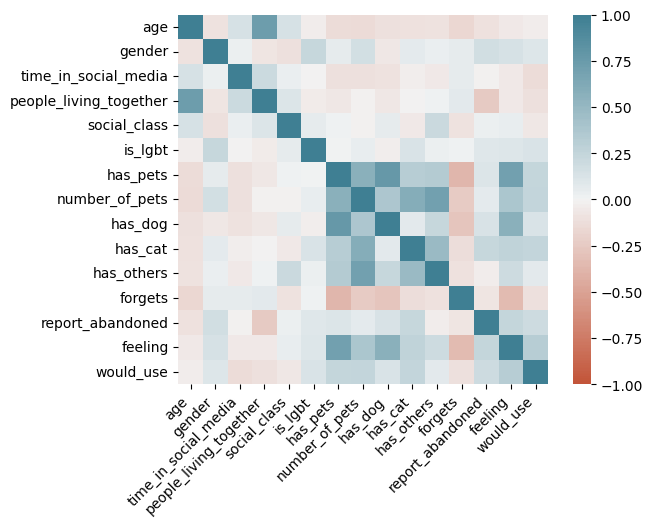

In [19]:
import seaborn as sns
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)